In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


## Data Preparation

In [2]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [3]:
len(XT)


25000

In [4]:
len(Xt)

25000

In [5]:
print(XT[0])
print(Yt)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[0 1 1 ... 0 0 0]


In [6]:
word_idx = imdb.get_word_index()

In [7]:
#print(word_idx.items())

In [8]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [9]:
#print(idx_word.items())

In [10]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

In [11]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
## Next Step - Vectorize the Data
## Vocab Size - 10,000 We will make sure every sentence is represented by a vector of len 10000 [00000111.....00101010]
import numpy as np
def vectorize_sentences(sentences,dim=10000):
  
  outputs = np.zeros((len(sentences),dim))
  
  for i,idx in enumerate(sentences):
    outputs[i,idx] = 1
   
  return outputs
    
  

In [13]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [14]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [15]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [16]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

### Defining Model Architecture

- Use Fully Connected/Dense Layers with RelU Activation   
- 2 Hidden Layers with 16 units each  
- 1 Output Layer with 1 unit (Sigmoid Activation)

In [17]:
from keras import models
from keras.layers import Dense


In [18]:
# Define the model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [19]:
# Compile the Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Training and Validation


In [21]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]

y_val = Y_train[:5000]
y_train_new = Y_train[5000:]

In [22]:
hist = model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 11s 550us/step - loss: 0.4619 - accuracy: 0.8101 - val_loss: 0.3376 - val_accuracy: 0.8768
Epoch 2/4
20000/20000 [==============================] - 4s 217us/step - loss: 0.2611 - accuracy: 0.9117 - val_loss: 0.2779 - val_accuracy: 0.8946
Epoch 3/4
20000/20000 [==============================] - 4s 193us/step - loss: 0.2030 - accuracy: 0.9295 - val_loss: 0.2754 - val_accuracy: 0.8884
Epoch 4/4
20000/20000 [==============================] - 4s 191us/step - loss: 0.1652 - accuracy: 0.9436 - val_loss: 0.2804 - val_accuracy: 0.8876


## Visualise our results

In [23]:
import matplotlib.pyplot as plt

In [24]:
h = hist.history
print(h)

{'val_loss': [0.3375731791973114, 0.27791766629219056, 0.2754346224308014, 0.2803657441139221], 'val_accuracy': [0.876800000667572, 0.894599974155426, 0.8884000182151794, 0.8876000046730042], 'loss': [0.4619046349525452, 0.26112923078536987, 0.2030413649201393, 0.1651659436225891], 'accuracy': [0.81005, 0.9117, 0.9295, 0.9436]}


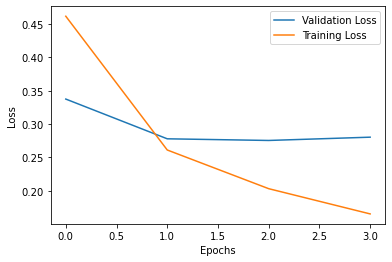

In [25]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

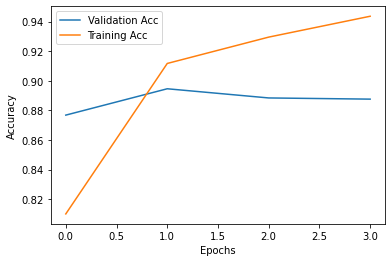

In [26]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 26s 1ms/step


0.8813599944114685

In [28]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 25s 981us/step


0.9443600177764893

In [29]:
prob=model.predict(X_test)
m=prob.shape[0]

In [31]:
prob_1=[]
for i in range(m):
    if(prob[i]>=0.5):
        prob_1.append(1)
    else:
        prob_1.append(0)
prob_1=np.asarray(prob_1)
print(prob_1)

[0 1 1 ... 0 0 1]


In [32]:
prediction=[]
for i in range(m):
    if(prob[i]>=0.5):
        prediction.append("positive")
    else:
        prediction.append("Negative")

In [33]:
#print(prediction)

In [34]:
import pandas as pd

In [35]:
df=pd.DataFrame(prediction,columns=['Prediction'])
df.head(n=10)

,Prediction
0,Negative
1,positive
2,positive
3,positive
4,positive
5,positive
6,positive
7,Negative
8,positive
9,positive


In [36]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     11752
           1       0.91      0.86      0.88     13248

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Confusion matrix, without normalization
[[10643  1109]
 [ 1857 11391]]


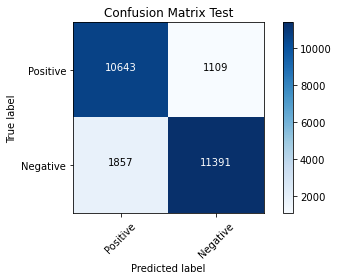

In [37]:

print(classification_report(prob_1,Yt))
cnf_matrix = confusion_matrix(prob_1,Yt)
plot_confusion_matrix(cnf_matrix,classes=["Positive","Negative"],title="Confusion Matrix Test")